In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,KNNImputer,IterativeImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,MinMaxScaler,StandardScaler,FunctionTransformer
from sklearn.feature_selection import f_regression,mutual_info_regression,chi2
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
data=pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")

In [3]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

# **Handling Missing Values**

Three ways :
1. Remove corresponding rows
2. Remove the column
3. **Inputation** : replace the missing value with some value like mean , median,mode of attribute.

In [4]:
data.isnull().values.any()

True

In [5]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
data.total_bedrooms.isnull().any()

True

In [7]:
# 1st option 
data.dropna(subset=['total_bedrooms'])
# 2nd option
data.drop(columns='total_bedrooms')

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0,INLAND


In [8]:
# 3rd option
imputer=SimpleImputer(strategy="median")
#will replace missing values with the median of data 
# most_frequent and constant strategy is supported by non-numercal data also
data_num=data.select_dtypes(include=[np.number])
imputer.fit(data_num)

SimpleImputer(strategy='median')

In [9]:
imputer.statistics_#median of each attribute

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [10]:
data_num=imputer.transform(data_num)

In [11]:
imputer=KNNImputer(n_neighbors=10)
# will take mean of 10 nearest neighbours
data_num=data.select_dtypes(include=[np.number])
imputer.fit(data_num)
data_num=imputer.transform(data_num)

In [12]:
imputer=IterativeImputer()
# trains a regression model based other features to predict the missing values 
data_num=data.select_dtypes(include=[np.number])
imputer.fit(data_num)
data_num=imputer.transform(data_num)

# **Handling Categorical Data**

Two ways :

1. Ordinal Encoding
2. OneHot Encoding
3. Embeddings

In [13]:
data_cat=data[['ocean_proximity']]

In [14]:
#1st option
ordinal_encoder=OrdinalEncoder()#will map each category to a number
data_cat_encoded=ordinal_encoder.fit_transform(data_cat)
data_cat_encoded

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [15]:
ordinal_encoder.categories_
#The disadvantage with this method is that ML algos might think that two 
#nearby values more similar than the far ones  

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [16]:
#2nd option
onehot_encoder=OneHotEncoder()
#it will create new columns for each category
# column value will be one if the that value is present in the row
data_cat_encoded=onehot_encoder.fit_transform(data_cat)
data_cat_encoded.toarray()
#Disadvantage : training increases vey much if large number of 
#categorries are present

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

You can try more encoders from https://contrib.scikit-learn.org/category_encoders/

# **Feature Scaling**

In [17]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Range of total_rooms is from 2 to 39320 and of median_income is from 0.499900 to 15.000100. Therefore , a ML algo may be more bias towards total_rooms . To avoid this we use feature scaling .

Few scallers :
1. Min-Max Scaling
2. Standardization

In [18]:
min_max_scaler=MinMaxScaler(feature_range=(-1,1))
# will bring value between -1 and 1
data_num=data.select_dtypes(include=[np.number])
data_num_min_max_scaled=min_max_scaler.fit_transform(data_num)
data_num_min_max_scaled

array([[-0.57768924,  0.13496281,  0.56862745, ..., -0.95888834,
         0.07933684,  0.80453276],
       [-0.57569721,  0.13071201, -0.21568627, ..., -0.62604835,
         0.07605412,  0.41649313],
       [-0.57968127,  0.12858661,  1.        , ..., -0.94211478,
        -0.06794389,  0.39010148],
       ...,
       [-0.37649402,  0.46439957, -0.37254902, ..., -0.85791811,
        -0.83447125, -0.6812343 ],
       [-0.39641434,  0.46439957, -0.33333333, ..., -0.88554514,
        -0.8114095 , -0.71257438],
       [-0.38047809,  0.45164718, -0.41176471, ..., -0.82601546,
        -0.73949325, -0.69319302]])

In [19]:
std_scaler=StandardScaler(with_mean=True,with_std=True)
# z=(x-mean)/std_deviation
data_num=data.select_dtypes(include=[np.number])
data_num_std_scaler=std_scaler.fit_transform(data_num)
data_num_std_scaler

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.97703285,
         2.34476576,  2.12963148],
       [-1.32284391,  1.04318455, -0.60701891, ...,  1.66996103,
         2.33223796,  1.31415614],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.84363692,
         1.7826994 ,  1.25869341],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.17404163,
        -1.14259331, -0.99274649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.39375258,
        -1.05458292, -1.05860847],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.07967221,
        -0.78012947, -1.01787803]])

(array([1.9816e+04, 7.1100e+02, 9.5000e+01, 1.2000e+01, 4.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([3.00000e+00, 3.57090e+03, 7.13880e+03, 1.07067e+04, 1.42746e+04,
        1.78425e+04, 2.14104e+04, 2.49783e+04, 2.85462e+04, 3.21141e+04,
        3.56820e+04]),
 <BarContainer object of 10 artists>)

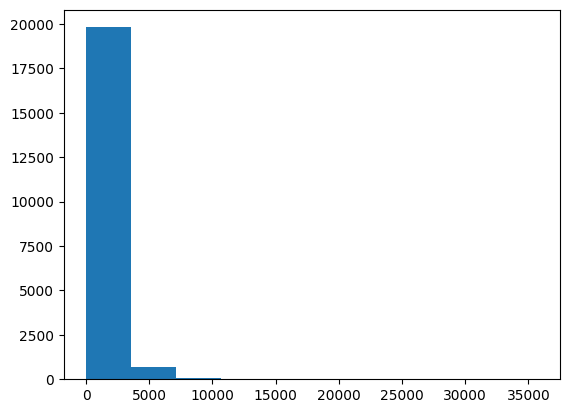

In [20]:
#case of heavy tail(when values far from the mean are not expotentialy rare)
plt.hist(x=data['population'])

(array([3.0000e+00, 2.1000e+01, 8.5000e+01, 1.8700e+02, 6.5600e+02,
        4.9080e+03, 1.1631e+04, 2.9050e+03, 2.3800e+02, 6.0000e+00]),
 array([ 1.09861229,  2.03699122,  2.97537016,  3.91374909,  4.85212803,
         5.79050696,  6.7288859 ,  7.66726483,  8.60564377,  9.5440227 ,
        10.48240164]),
 <BarContainer object of 10 artists>)

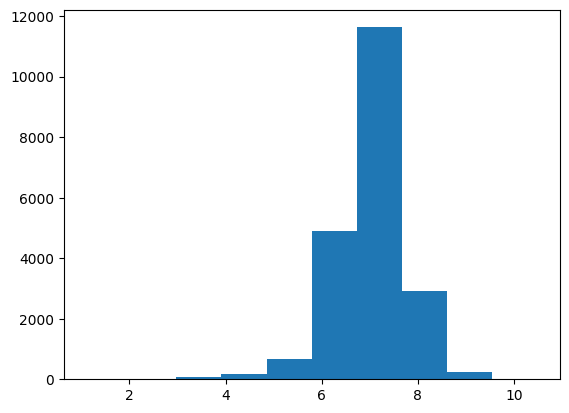

In [21]:
#Strategy: make it look closer to bell curve(gaussian curve)
log_transformer=FunctionTransformer(np.log,inverse_func=np.exp)
log_pop=log_transformer.transform(data['population'])
plt.hist(x=log_pop)

# **Outlier Handling**

In [22]:
X=data.iloc[:,:-2]
y=data.iloc[:,-2]

# **Z-score :**
The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

In [23]:
#Z-score
z = np.abs(stats.zscore(X))
z

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,1.327835,1.052548,0.982143,0.804819,NaN,0.974429,0.977033,2.344766
1,1.322844,1.043185,0.607019,2.045890,NaN,0.861439,1.669961,2.332238
2,1.332827,1.038503,1.856182,0.535746,NaN,0.820777,0.843637,1.782699
3,1.337818,1.038503,1.856182,0.624215,NaN,0.766028,0.733781,0.932968
4,1.337818,1.038503,1.856182,0.462404,NaN,0.759847,0.629157,0.012881
...,...,...,...,...,...,...,...,...
20635,0.758826,1.801647,0.289187,0.444985,NaN,0.512592,0.443449,1.216128
20636,0.818722,1.806329,0.845393,0.888704,NaN,0.944405,1.008420,0.691593
20637,0.823713,1.778237,0.924851,0.174995,NaN,0.369537,0.174042,1.142593
20638,0.873626,1.778237,0.845393,0.355600,NaN,0.604429,0.393753,1.054583


In [24]:
threshold = 4
print(np.where(z > threshold))

(array([   95,   131,   283,   508,   510,   511,   512,   514,   570,
         570,   570,   576,   864,   864,   864,   865,   865,   865,
         869,   871,   871,   871,   922,   922,   922,   985,   995,
         995,  1010,  1010,  1010,  1021,  1021,  1021,  1060,  1060,
        1060,  1277,  1508,  1508,  1560,  1560,  1564,  1566,  1583,
        1586,  1617,  1642,  1642,  1642,  1645,  1645,  1646,  1700,
        1700,  1700,  1930,  2294,  2311,  2963,  2963,  2963,  2975,
        2975,  2999,  3177,  3413,  3554,  3560,  3603,  3603,  3621,
        3621,  3648,  3648,  3942,  3942,  3981,  3981,  3996,  3996,
        4035,  4035,  4035,  4042,  4047,  4116,  4220,  4229,  4253,
        4262,  4266,  4345,  4352,  4579,  4579,  4604,  4605,  4606,
        4616,  4616,  4626,  4634,  4636,  4636,  4678,  4686,  5242,
        5243,  5244,  5247,  5248,  5250,  5253,  5256,  5257,  5258,
        5259,  5260,  5272,  5275,  5281,  5291,  5304,  5352,  5383,
        5494,  5540

# **IQR :**
The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.

It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

In [25]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

longitude                3.79000
latitude                 3.78000
housing_median_age      19.00000
total_rooms           1700.25000
total_bedrooms         351.00000
population             938.00000
households             325.00000
median_income            2.17985
dtype: float64


In [26]:
threshold=0.5
print(X < (Q1 - threshold * IQR) |(X > (Q3 + threshold* IQR)))

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0           True     False               False        False           False   
1           True     False               False        False           False   
2           True     False               False        False           False   
3           True     False               False        False           False   
4           True     False               False        False           False   
...          ...       ...                 ...          ...             ...   
20635       True     False               False        False           False   
20636       True     False               False        False           False   
20637       True     False               False        False           False   
20638       True     False               False        False           False   
20639       True     False               False        False           False   

       population  households  median_income  
0   

# **Feature Engineering**

In [27]:
data_fscore=data.dropna()
X=data_fscore.iloc[:,:-2]
y=data_fscore.iloc[:,-2]

# **Feature selection:**


1. **Mutual Information:**
Mutual information score can capture both linear and non-linear relationships between feature and target column, but needs more samples.
2. **F-score :**
F-score can find the linear relation between feature and target columns, and create scores accordingly. Using scores for each feature, we can eliminate the ones with a lower F-score.
3. **Chi-square score :**
Chi square is a test used in statistics to test the independence of two events. A lower value of chi square suggests that the two variables(feature and target) are independent. Higher values for two variables means dependent hence important features.(only for non negative values)

<BarContainer object of 8 artists>

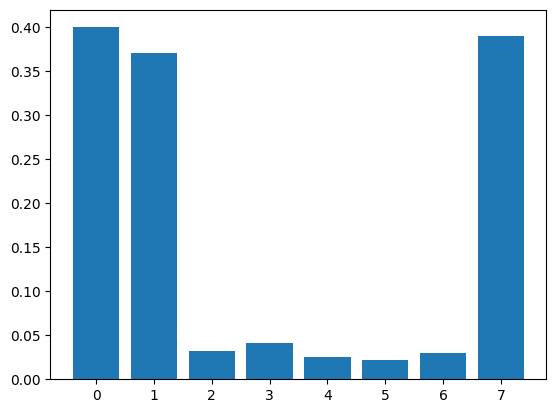

In [28]:
#method 1
scores=mutual_info_regression(X,y)
scores
plt.bar([i for i in range(len(data_fscore.columns)-2)],scores)

<BarContainer object of 8 artists>

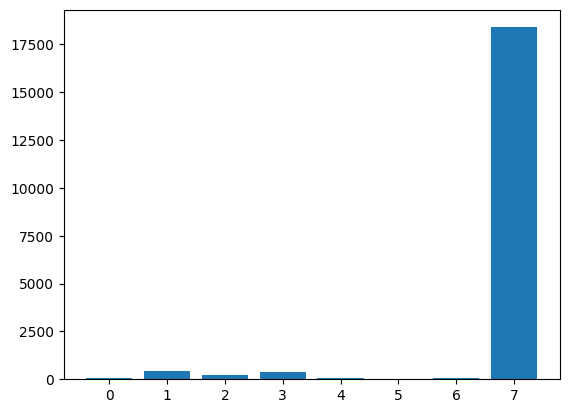

In [29]:
#method 2
scores, _ =f_regression(X,y)
scores
plt.bar([i for i in range(len(data_fscore.columns)-2)],scores)

# **Feature construction:**
Tips :
- Understand the features. Refer to your dataset's data documentation, if available.
- Visualize the data.

<BarContainer object of 9 artists>

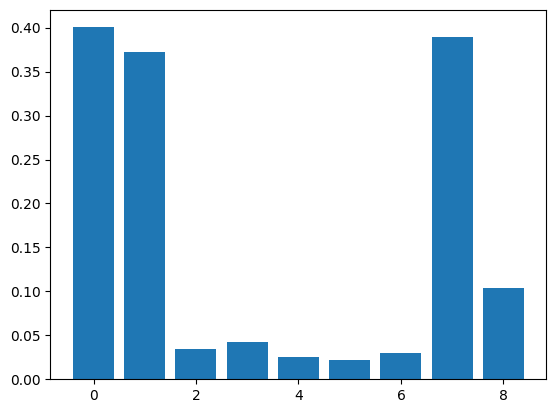

In [30]:
#Example :
X['avg_rooms_per_house']=X['total_rooms']/X['households']
scores=mutual_info_regression(X,y)
scores
plt.bar([i for i in range(len(data_fscore.columns)-1)],scores)

# **Cluster Labels as a Feature:(Divide and Conquer)**
The idea for adding cluster labels is that the clusters will break up complicated relationships across features into simpler chunks. Our model can then just learn the simpler chunks one-by-one instead having to learn the complicated whole all at once.

In [31]:
kmeans = KMeans(n_clusters=6)
X = data.loc[:, ["latitude", "longitude"]]
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


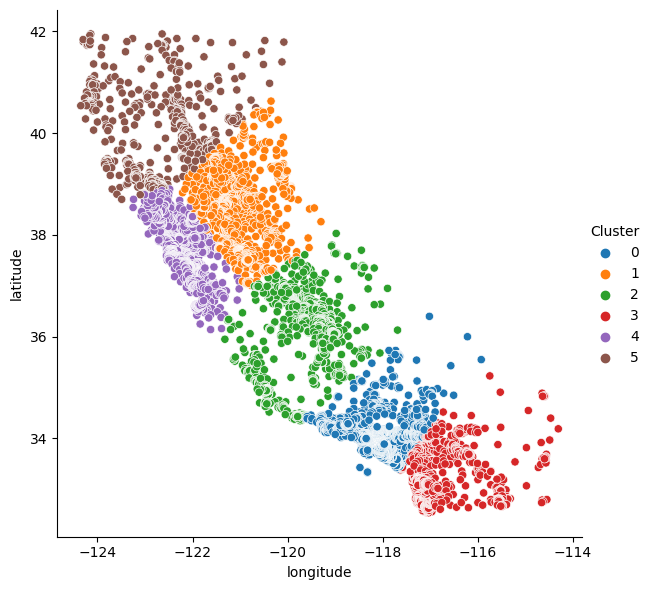

In [32]:
sns.relplot(
    x="longitude", y="latitude", hue="Cluster", data=X, height=6,
);